In [1]:
import torch
import random
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import torch_geometric as pyg
import torch_geometric.data as pyg_data
from torch_geometric.nn import GCNConv
from sklearn.neighbors import NearestNeighbors
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import GATConv
import networkx as nx
from sklearn.decomposition import PCA
import scipy.io
import sys
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

In [2]:
### Hyperparameters
run_epochs = 1000
lr = 0.01
weight_decay = 5e-4
graph_type = 'knn_nodrop'      # 'knn_drop', 'knn_nodrop', 'random1', 'random2'
k_neighbors = 30
knn_metric = 'cosine'      # 'cosine', 'p', 'sqeucledian'
drop_classes = 0
drop_edges = k_neighbors*(k_neighbors-1)//2
drop_ratio = 1
# 'seuclidean', 'p', 'sqeuclidean', 'mahalanobis', 'pyfunc', 'jaccard', 'nan_euclidean', 'cityblock', 'manhattan', 'precomputed', 'cosine', 'yule', 'infinity', 'sokalsneath', 'rogerstanimoto', 'euclidean', 'russellrao', 'canberra', 'haversine', 'correlation', 'l1', 'chebyshev', 'sokalmichener', 'braycurtis', 'dice', 'l2', 'hamming', 'minkowski'
density = 0.1

Random seed is set to 0.
{'AD': 0, 'MCI': 1, 'MCIn': 2, 'MCIp': 3, 'NC': 4}
Shape of data matrix:  (301, 186)
Shape of labels vector:  (301,)
Epoch 630: Train: 0.9888, Val: 0.3500, Test: 0.3492
Epoch 631: Train: 0.9888, Val: 0.3500, Test: 0.3333
Epoch 632: Train: 0.9888, Val: 0.3500, Test: 0.3175
Epoch 633: Train: 0.9888, Val: 0.3500, Test: 0.3175
Epoch 634: Train: 0.9888, Val: 0.3500, Test: 0.3333
Epoch 635: Train: 0.9888, Val: 0.3500, Test: 0.3175
Epoch 636: Train: 0.9888, Val: 0.3500, Test: 0.3016
Epoch 637: Train: 0.9888, Val: 0.3500, Test: 0.3016
Epoch 638: Train: 0.9944, Val: 0.3500, Test: 0.3016
Epoch 639: Train: 0.9944, Val: 0.3500, Test: 0.3016
Best test epoch 630: train_acc=0.9888, val_acc=0.3500, test_acc=0.3492
avg_acc: 0.2848


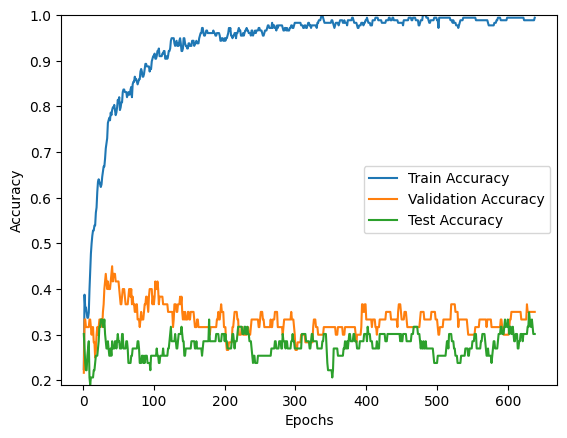

Random seed is set to 1.
{'AD': 0, 'MCI': 1, 'MCIn': 2, 'MCIp': 3, 'NC': 4}
Shape of data matrix:  (301, 186)
Shape of labels vector:  (301,)
Epoch 518: Train: 0.9944, Val: 0.3000, Test: 0.3651
Epoch 519: Train: 0.9944, Val: 0.3000, Test: 0.3651
Epoch 520: Train: 0.9944, Val: 0.3000, Test: 0.3492
Epoch 521: Train: 0.9944, Val: 0.3000, Test: 0.3492
Epoch 522: Train: 0.9888, Val: 0.3000, Test: 0.3333
Epoch 523: Train: 0.9888, Val: 0.3000, Test: 0.3175
Epoch 524: Train: 0.9888, Val: 0.2833, Test: 0.3016
Epoch 525: Train: 0.9944, Val: 0.2833, Test: 0.3016
Epoch 526: Train: 0.9944, Val: 0.2833, Test: 0.3016
Epoch 527: Train: 0.9944, Val: 0.2833, Test: 0.3016
Best test epoch 518: train_acc=0.9944, val_acc=0.3000, test_acc=0.3651
avg_acc: 0.3013


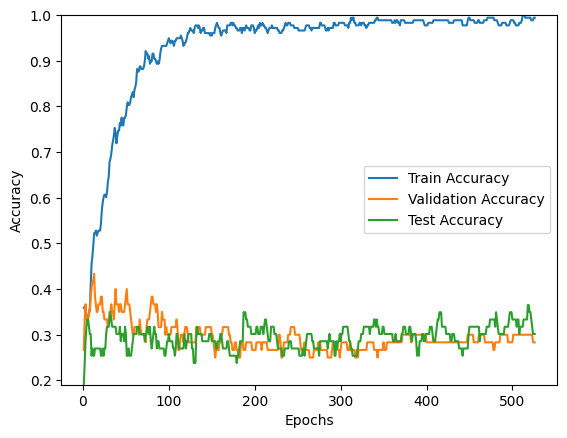

Random seed is set to 2.
{'AD': 0, 'MCI': 1, 'MCIn': 2, 'MCIp': 3, 'NC': 4}
Shape of data matrix:  (301, 186)
Shape of labels vector:  (301,)
Epoch 12: Train: 0.4719, Val: 0.2667, Test: 0.3333
Epoch 13: Train: 0.4944, Val: 0.2667, Test: 0.3333
Epoch 14: Train: 0.5281, Val: 0.2833, Test: 0.2857
Epoch 15: Train: 0.5225, Val: 0.3000, Test: 0.2698
Epoch 16: Train: 0.5169, Val: 0.3167, Test: 0.2698
Epoch 17: Train: 0.5112, Val: 0.3167, Test: 0.2857
Epoch 18: Train: 0.5056, Val: 0.3333, Test: 0.2857
Epoch 19: Train: 0.5169, Val: 0.3333, Test: 0.2857
Epoch 20: Train: 0.5281, Val: 0.3167, Test: 0.2540
Epoch 21: Train: 0.5562, Val: 0.3333, Test: 0.2222
Best test epoch 12: train_acc=0.4719, val_acc=0.2667, test_acc=0.3333
avg_acc: 0.1931


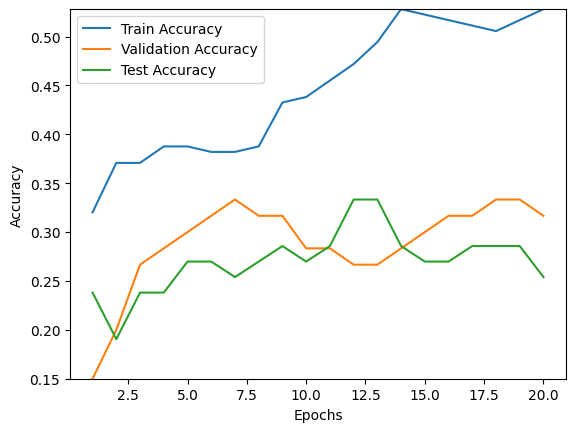

Random seed is set to 3.
{'AD': 0, 'MCI': 1, 'MCIn': 2, 'MCIp': 3, 'NC': 4}
Shape of data matrix:  (301, 186)
Shape of labels vector:  (301,)
Epoch 15: Train: 0.5337, Val: 0.2833, Test: 0.3810
Epoch 16: Train: 0.5506, Val: 0.2667, Test: 0.3651
Epoch 17: Train: 0.5562, Val: 0.2833, Test: 0.3651
Epoch 18: Train: 0.5506, Val: 0.2833, Test: 0.3492
Epoch 19: Train: 0.5618, Val: 0.2833, Test: 0.3492
Epoch 20: Train: 0.5730, Val: 0.3167, Test: 0.3333
Epoch 21: Train: 0.5787, Val: 0.3000, Test: 0.3175
Epoch 22: Train: 0.5730, Val: 0.3333, Test: 0.3175
Epoch 23: Train: 0.6067, Val: 0.3167, Test: 0.3016
Epoch 24: Train: 0.6236, Val: 0.3000, Test: 0.3175
Best test epoch 15: train_acc=0.5337, val_acc=0.2833, test_acc=0.3810
avg_acc: 0.2914


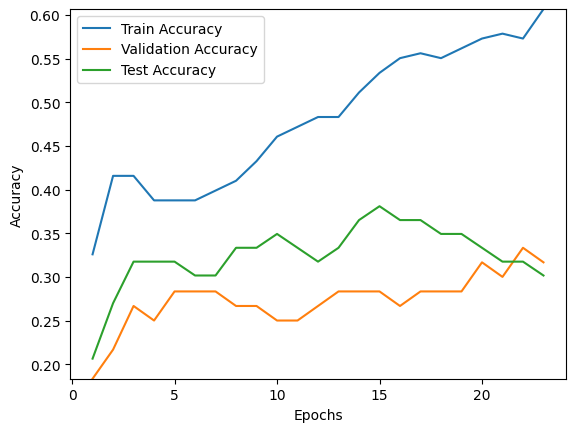

Random seed is set to 4.
{'AD': 0, 'MCI': 1, 'MCIn': 2, 'MCIp': 3, 'NC': 4}
Shape of data matrix:  (301, 186)
Shape of labels vector:  (301,)
Epoch 40: Train: 0.7809, Val: 0.1667, Test: 0.3968
Epoch 41: Train: 0.7697, Val: 0.1833, Test: 0.3810
Epoch 42: Train: 0.7640, Val: 0.1667, Test: 0.3810
Epoch 43: Train: 0.7753, Val: 0.1667, Test: 0.3651
Epoch 44: Train: 0.7921, Val: 0.1500, Test: 0.3651
Epoch 45: Train: 0.7978, Val: 0.1500, Test: 0.3492
Epoch 46: Train: 0.8034, Val: 0.1500, Test: 0.3333
Epoch 47: Train: 0.8034, Val: 0.1500, Test: 0.3175
Epoch 48: Train: 0.8146, Val: 0.1333, Test: 0.3333
Epoch 49: Train: 0.7809, Val: 0.1500, Test: 0.3016
Best test epoch 40: train_acc=0.7809, val_acc=0.1667, test_acc=0.3968
avg_acc: 0.2706


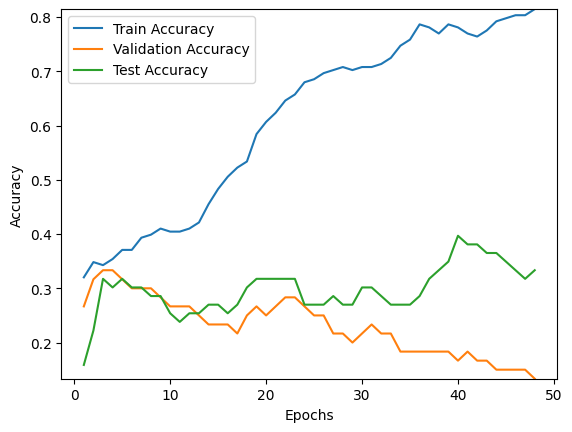

dataset/ADNI.mat: The average accuracy is 0.3651
---------------------------------------------------------------------------------------------------------------------------------

Random seed is set to 0.
{'NC': 0, 'PD': 1}
Shape of data matrix:  (543, 294)
Shape of labels vector:  (543,)
Epoch 7: Train: 0.7415, Val: 0.6239, Test: 0.7156
Epoch 8: Train: 0.7538, Val: 0.6147, Test: 0.7156
Epoch 9: Train: 0.7754, Val: 0.6055, Test: 0.6972
Epoch 10: Train: 0.7969, Val: 0.5780, Test: 0.6881
Epoch 11: Train: 0.7938, Val: 0.6147, Test: 0.6881
Epoch 12: Train: 0.8092, Val: 0.5963, Test: 0.6789
Epoch 13: Train: 0.8277, Val: 0.5780, Test: 0.6881
Epoch 14: Train: 0.8523, Val: 0.5872, Test: 0.6881
Epoch 15: Train: 0.8585, Val: 0.5780, Test: 0.6789
Epoch 16: Train: 0.8615, Val: 0.5780, Test: 0.6972
Best test epoch 7: train_acc=0.7415, val_acc=0.6239, test_acc=0.7156
avg_acc: 0.5518


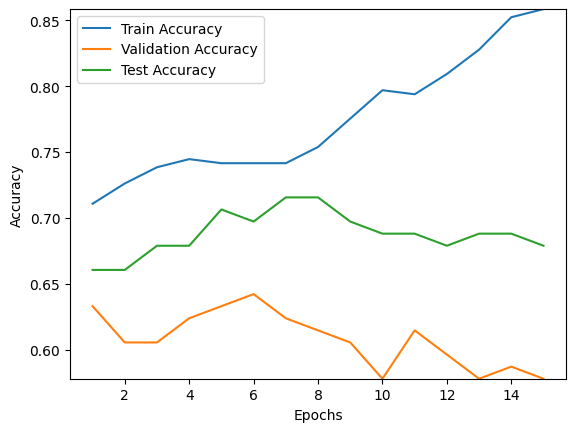

Random seed is set to 1.
{'NC': 0, 'PD': 1}
Shape of data matrix:  (543, 294)
Shape of labels vector:  (543,)
Epoch 3: Train: 0.7415, Val: 0.6055, Test: 0.7431
Epoch 4: Train: 0.7292, Val: 0.6514, Test: 0.6972
Epoch 5: Train: 0.7262, Val: 0.6789, Test: 0.6514
Epoch 6: Train: 0.7292, Val: 0.6789, Test: 0.6606
Epoch 7: Train: 0.7262, Val: 0.6789, Test: 0.6697
Epoch 8: Train: 0.7354, Val: 0.6789, Test: 0.6697
Epoch 9: Train: 0.7538, Val: 0.6697, Test: 0.6697
Epoch 10: Train: 0.7662, Val: 0.6514, Test: 0.6789
Epoch 11: Train: 0.7908, Val: 0.6239, Test: 0.6606
Epoch 12: Train: 0.8215, Val: 0.6147, Test: 0.6697
Best test epoch 3: train_acc=0.7415, val_acc=0.6055, test_acc=0.7431
avg_acc: 0.5077


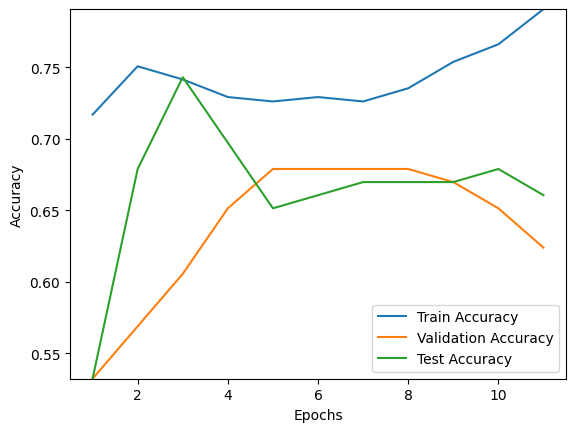

Random seed is set to 2.
{'NC': 0, 'PD': 1}
Shape of data matrix:  (543, 294)
Shape of labels vector:  (543,)
Epoch 7: Train: 0.7077, Val: 0.6606, Test: 0.6789
Epoch 8: Train: 0.7200, Val: 0.6330, Test: 0.6789
Epoch 9: Train: 0.7292, Val: 0.6330, Test: 0.6422
Epoch 10: Train: 0.7415, Val: 0.6422, Test: 0.6055
Epoch 11: Train: 0.7477, Val: 0.6055, Test: 0.5780
Epoch 12: Train: 0.7600, Val: 0.6147, Test: 0.5780
Epoch 13: Train: 0.7692, Val: 0.6055, Test: 0.5505
Epoch 14: Train: 0.7815, Val: 0.5688, Test: 0.5321
Epoch 15: Train: 0.7938, Val: 0.5505, Test: 0.5505
Epoch 16: Train: 0.8123, Val: 0.5413, Test: 0.5596
Best test epoch 7: train_acc=0.7077, val_acc=0.6606, test_acc=0.6789
avg_acc: 0.4904


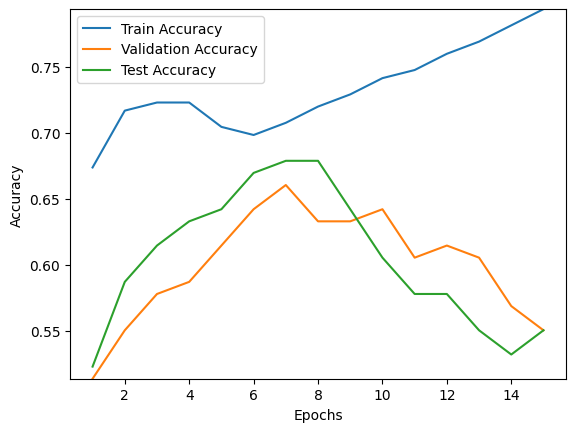

Random seed is set to 3.
{'NC': 0, 'PD': 1}
Shape of data matrix:  (543, 294)
Shape of labels vector:  (543,)
Epoch 9: Train: 0.7969, Val: 0.6606, Test: 0.7064
Epoch 10: Train: 0.8154, Val: 0.6606, Test: 0.6972
Epoch 11: Train: 0.8369, Val: 0.6330, Test: 0.6330
Epoch 12: Train: 0.8492, Val: 0.6147, Test: 0.6147
Epoch 13: Train: 0.8585, Val: 0.5872, Test: 0.5872
Epoch 14: Train: 0.8677, Val: 0.5872, Test: 0.5688
Epoch 15: Train: 0.8831, Val: 0.6055, Test: 0.5596
Epoch 16: Train: 0.8800, Val: 0.6147, Test: 0.5596
Epoch 17: Train: 0.9077, Val: 0.6055, Test: 0.5413
Epoch 18: Train: 0.9138, Val: 0.6055, Test: 0.5413
Best test epoch 9: train_acc=0.7969, val_acc=0.6606, test_acc=0.7064
avg_acc: 0.4690


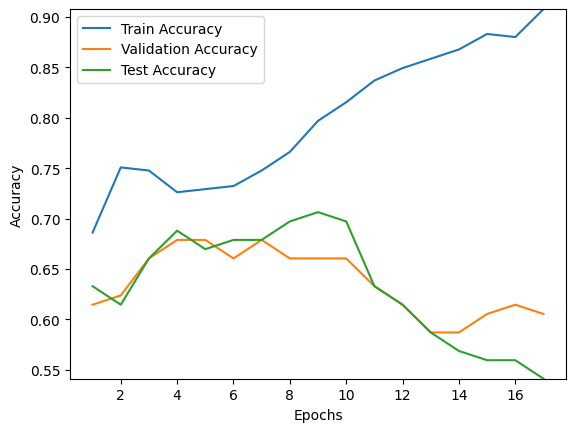

Random seed is set to 4.
{'NC': 0, 'PD': 1}
Shape of data matrix:  (543, 294)
Shape of labels vector:  (543,)
Epoch 5: Train: 0.7508, Val: 0.5596, Test: 0.6697
Epoch 6: Train: 0.7446, Val: 0.5963, Test: 0.6606
Epoch 7: Train: 0.7354, Val: 0.5963, Test: 0.6606
Epoch 8: Train: 0.7385, Val: 0.5872, Test: 0.6606
Epoch 9: Train: 0.7508, Val: 0.5780, Test: 0.6514
Epoch 10: Train: 0.7631, Val: 0.5688, Test: 0.6514
Epoch 11: Train: 0.7723, Val: 0.5505, Test: 0.6514
Epoch 12: Train: 0.7846, Val: 0.5413, Test: 0.6330
Epoch 13: Train: 0.7877, Val: 0.5321, Test: 0.6239
Epoch 14: Train: 0.8000, Val: 0.5229, Test: 0.6147
Best test epoch 5: train_acc=0.7508, val_acc=0.5596, test_acc=0.6697
avg_acc: 0.5199


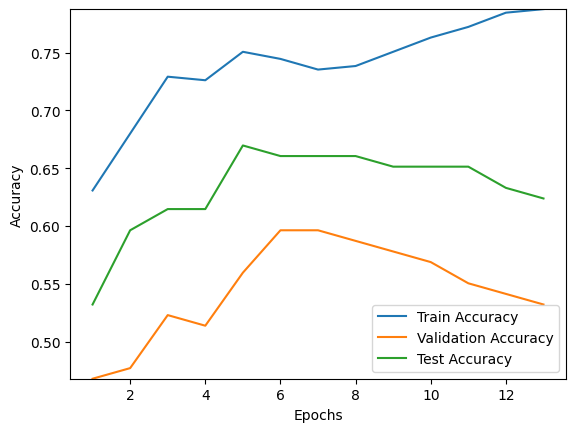

dataset/PPMI.mat: The average accuracy is 0.7028
---------------------------------------------------------------------------------------------------------------------------------

Random seed is set to 0.
{'AD': 0, 'EMCI': 1, 'LMCI': 2, 'NC': 3}
Shape of data matrix:  (206, 10800)
Shape of labels vector:  (206,)
Epoch 443: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 444: Train: 0.9504, Val: 0.3095, Test: 0.3256
Epoch 445: Train: 0.9504, Val: 0.3095, Test: 0.3488
Epoch 446: Train: 0.9504, Val: 0.2857, Test: 0.3488
Epoch 447: Train: 0.9421, Val: 0.2857, Test: 0.3488
Epoch 448: Train: 0.9504, Val: 0.2857, Test: 0.3488
Epoch 449: Train: 0.9339, Val: 0.2857, Test: 0.3488
Epoch 450: Train: 0.9421, Val: 0.2857, Test: 0.3488
Epoch 451: Train: 0.9339, Val: 0.3095, Test: 0.3488
Epoch 452: Train: 0.9339, Val: 0.2857, Test: 0.3488
Best test epoch 443: train_acc=0.9504, val_acc=0.2857, test_acc=0.3721
avg_acc: 0.3174


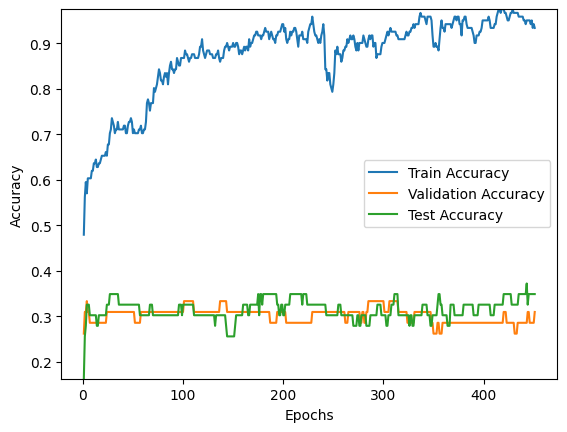

Random seed is set to 1.
{'AD': 0, 'EMCI': 1, 'LMCI': 2, 'NC': 3}
Shape of data matrix:  (206, 10800)
Shape of labels vector:  (206,)
Epoch 548: Train: 0.9256, Val: 0.2857, Test: 0.3721
Epoch 549: Train: 0.9256, Val: 0.2619, Test: 0.3721
Epoch 550: Train: 0.9174, Val: 0.2619, Test: 0.3721
Epoch 551: Train: 0.9256, Val: 0.2619, Test: 0.3721
Epoch 552: Train: 0.9174, Val: 0.2619, Test: 0.3721
Epoch 553: Train: 0.9174, Val: 0.2619, Test: 0.3721
Epoch 554: Train: 0.9174, Val: 0.2619, Test: 0.3721
Epoch 555: Train: 0.9174, Val: 0.2857, Test: 0.3488
Epoch 556: Train: 0.9174, Val: 0.3095, Test: 0.3256
Epoch 557: Train: 0.9174, Val: 0.3333, Test: 0.3256
Best test epoch 548: train_acc=0.9256, val_acc=0.2857, test_acc=0.3721
avg_acc: 0.3029


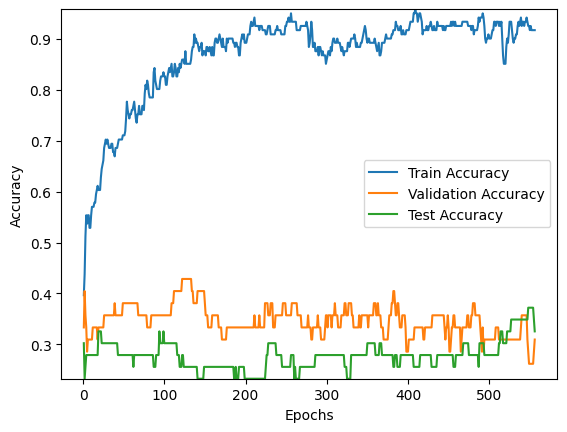

Random seed is set to 2.
{'AD': 0, 'EMCI': 1, 'LMCI': 2, 'NC': 3}
Shape of data matrix:  (206, 10800)
Shape of labels vector:  (206,)
Epoch 139: Train: 0.8926, Val: 0.2857, Test: 0.3721
Epoch 140: Train: 0.9174, Val: 0.2619, Test: 0.3488
Epoch 141: Train: 0.9174, Val: 0.3095, Test: 0.3256
Epoch 142: Train: 0.9256, Val: 0.3095, Test: 0.3256
Epoch 143: Train: 0.9174, Val: 0.3095, Test: 0.3256
Epoch 144: Train: 0.9008, Val: 0.3095, Test: 0.3023
Epoch 145: Train: 0.8926, Val: 0.3095, Test: 0.3256
Epoch 146: Train: 0.8926, Val: 0.3095, Test: 0.3256
Epoch 147: Train: 0.8843, Val: 0.3095, Test: 0.3256
Epoch 148: Train: 0.8843, Val: 0.3095, Test: 0.3256
Best test epoch 139: train_acc=0.8926, val_acc=0.2857, test_acc=0.3721
avg_acc: 0.3216


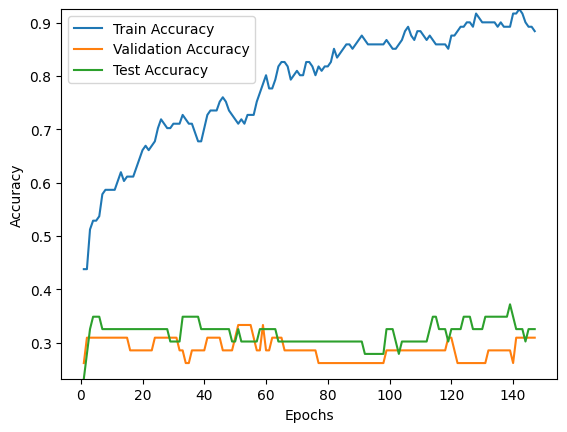

Random seed is set to 3.
{'AD': 0, 'EMCI': 1, 'LMCI': 2, 'NC': 3}
Shape of data matrix:  (206, 10800)
Shape of labels vector:  (206,)
Epoch 297: Train: 0.9669, Val: 0.2143, Test: 0.3488
Epoch 298: Train: 0.9669, Val: 0.2143, Test: 0.3488
Epoch 299: Train: 0.9752, Val: 0.2143, Test: 0.3488
Epoch 300: Train: 0.9587, Val: 0.2381, Test: 0.3256
Epoch 301: Train: 0.9587, Val: 0.2381, Test: 0.3256
Epoch 302: Train: 0.9504, Val: 0.2381, Test: 0.3256
Epoch 303: Train: 0.9504, Val: 0.2381, Test: 0.3023
Epoch 304: Train: 0.9504, Val: 0.2381, Test: 0.3023
Epoch 305: Train: 0.9504, Val: 0.2381, Test: 0.3256
Epoch 306: Train: 0.9504, Val: 0.2381, Test: 0.3488
Best test epoch 297: train_acc=0.9669, val_acc=0.2143, test_acc=0.3488
avg_acc: 0.2831


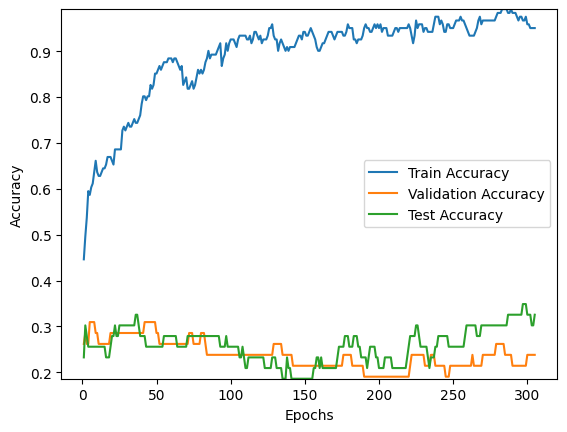

Random seed is set to 4.
{'AD': 0, 'EMCI': 1, 'LMCI': 2, 'NC': 3}
Shape of data matrix:  (206, 10800)
Shape of labels vector:  (206,)
Epoch 451: Train: 0.9504, Val: 0.2857, Test: 0.3953
Epoch 452: Train: 0.9504, Val: 0.2857, Test: 0.3953
Epoch 453: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 454: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 455: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 456: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 457: Train: 0.9504, Val: 0.2857, Test: 0.3721
Epoch 458: Train: 0.9504, Val: 0.2857, Test: 0.3953
Epoch 459: Train: 0.9504, Val: 0.2857, Test: 0.3953
Epoch 460: Train: 0.9504, Val: 0.2857, Test: 0.3953
Best test epoch 451: train_acc=0.9504, val_acc=0.2857, test_acc=0.3953
avg_acc: 0.3229


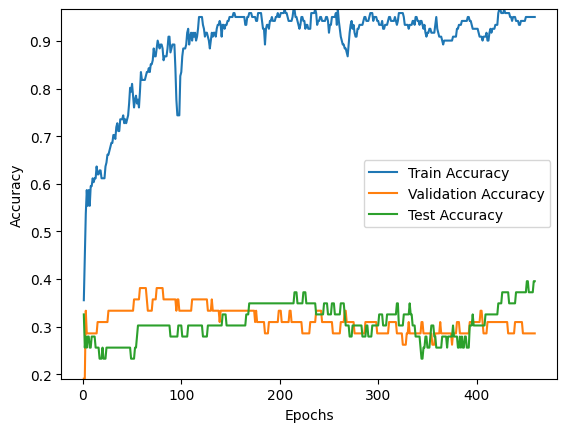

dataset/ADNI_90_120_fMRI.mat: The average accuracy is 0.3721
---------------------------------------------------------------------------------------------------------------------------------

Random seed is set to 0.
{'FTD': 0, 'NC': 1}
Shape of data matrix:  (181, 18000)
Shape of labels vector:  (181,)
Epoch 1: Train: 0.7870, Val: 0.4444, Test: 0.6216
Epoch 2: Train: 0.8241, Val: 0.4444, Test: 0.5946
Epoch 3: Train: 0.8519, Val: 0.3889, Test: 0.5135
Epoch 4: Train: 0.8519, Val: 0.4722, Test: 0.4865
Epoch 5: Train: 0.8611, Val: 0.4722, Test: 0.4595
Epoch 6: Train: 0.8704, Val: 0.5000, Test: 0.4324
Epoch 7: Train: 0.8889, Val: 0.4722, Test: 0.4324
Epoch 8: Train: 0.8704, Val: 0.4722, Test: 0.4324
Epoch 9: Train: 0.8704, Val: 0.4722, Test: 0.4595
Epoch 10: Train: 0.8704, Val: 0.4722, Test: 0.4865
Best test epoch 1: train_acc=0.7870, val_acc=0.4444, test_acc=0.6216
avg_acc: 0.5295


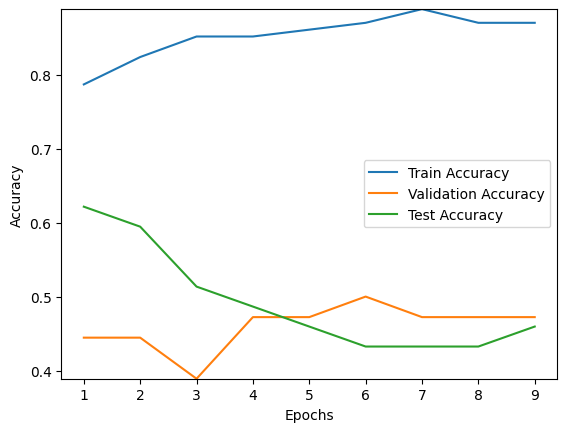

Random seed is set to 1.
{'FTD': 0, 'NC': 1}
Shape of data matrix:  (181, 18000)
Shape of labels vector:  (181,)
Epoch 602: Train: 1.0000, Val: 0.3889, Test: 0.6486
Epoch 603: Train: 1.0000, Val: 0.3889, Test: 0.6216
Epoch 604: Train: 1.0000, Val: 0.3889, Test: 0.5946
Epoch 605: Train: 1.0000, Val: 0.4167, Test: 0.5676
Epoch 606: Train: 1.0000, Val: 0.3889, Test: 0.5405
Epoch 607: Train: 1.0000, Val: 0.3889, Test: 0.5405
Epoch 608: Train: 1.0000, Val: 0.3889, Test: 0.5676
Epoch 609: Train: 1.0000, Val: 0.3889, Test: 0.5405
Epoch 610: Train: 1.0000, Val: 0.3889, Test: 0.5676
Epoch 611: Train: 1.0000, Val: 0.3611, Test: 0.5676
Best test epoch 602: train_acc=1.0000, val_acc=0.3889, test_acc=0.6486
avg_acc: 0.5352


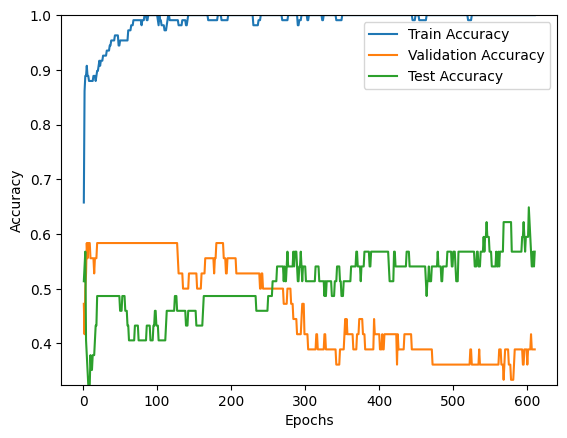

Random seed is set to 2.
{'FTD': 0, 'NC': 1}
Shape of data matrix:  (181, 18000)
Shape of labels vector:  (181,)
Epoch 417: Train: 1.0000, Val: 0.5000, Test: 0.8649
Epoch 418: Train: 1.0000, Val: 0.4722, Test: 0.8649
Epoch 419: Train: 1.0000, Val: 0.5556, Test: 0.8378
Epoch 420: Train: 1.0000, Val: 0.5556, Test: 0.8378
Epoch 421: Train: 1.0000, Val: 0.5556, Test: 0.8378
Epoch 422: Train: 0.9907, Val: 0.5556, Test: 0.8378
Epoch 423: Train: 0.9907, Val: 0.5556, Test: 0.8108
Epoch 424: Train: 0.9907, Val: 0.5556, Test: 0.8108
Epoch 425: Train: 1.0000, Val: 0.5556, Test: 0.8108
Epoch 426: Train: 1.0000, Val: 0.5556, Test: 0.8108
Best test epoch 417: train_acc=1.0000, val_acc=0.5000, test_acc=0.8649
avg_acc: 0.7144


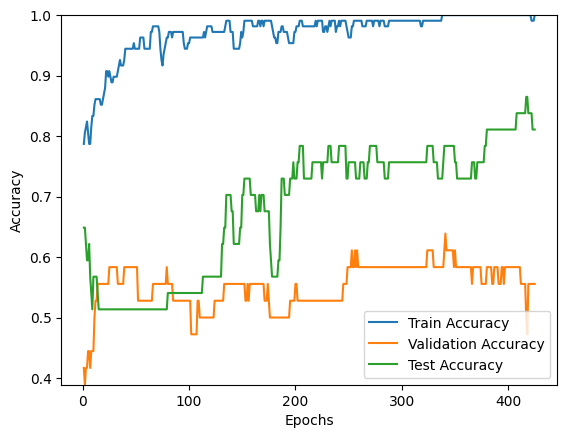

Random seed is set to 3.
{'FTD': 0, 'NC': 1}
Shape of data matrix:  (181, 18000)
Shape of labels vector:  (181,)
Epoch 828: Train: 1.0000, Val: 0.5833, Test: 0.6486
Epoch 829: Train: 1.0000, Val: 0.5833, Test: 0.6486
Epoch 830: Train: 1.0000, Val: 0.5833, Test: 0.6486
Epoch 831: Train: 1.0000, Val: 0.5833, Test: 0.6216
Epoch 832: Train: 1.0000, Val: 0.5556, Test: 0.6216
Epoch 833: Train: 1.0000, Val: 0.6111, Test: 0.6216
Epoch 834: Train: 1.0000, Val: 0.5556, Test: 0.6216
Epoch 835: Train: 1.0000, Val: 0.5278, Test: 0.5405
Epoch 836: Train: 1.0000, Val: 0.5278, Test: 0.5405
Epoch 837: Train: 1.0000, Val: 0.5556, Test: 0.5405
Best test epoch 828: train_acc=1.0000, val_acc=0.5833, test_acc=0.6486
avg_acc: 0.5449


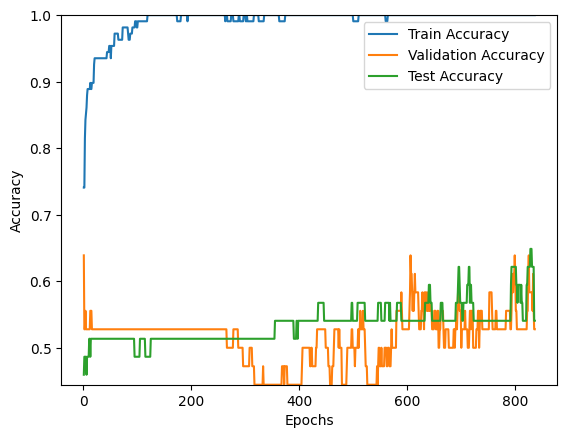

Random seed is set to 4.
{'FTD': 0, 'NC': 1}
Shape of data matrix:  (181, 18000)
Shape of labels vector:  (181,)
Epoch 1: Train: 0.6759, Val: 0.3611, Test: 0.7027
Epoch 2: Train: 0.7407, Val: 0.4167, Test: 0.6216
Epoch 3: Train: 0.8056, Val: 0.5000, Test: 0.5676
Epoch 4: Train: 0.7870, Val: 0.5278, Test: 0.5946
Epoch 5: Train: 0.7870, Val: 0.5278, Test: 0.5946
Epoch 6: Train: 0.7963, Val: 0.5278, Test: 0.6757
Epoch 7: Train: 0.7963, Val: 0.5000, Test: 0.6757
Epoch 8: Train: 0.8056, Val: 0.5000, Test: 0.6486
Epoch 9: Train: 0.8241, Val: 0.5000, Test: 0.6486
Epoch 10: Train: 0.8241, Val: 0.4722, Test: 0.5946
Best test epoch 1: train_acc=0.6759, val_acc=0.3611, test_acc=0.7027
avg_acc: 0.5175


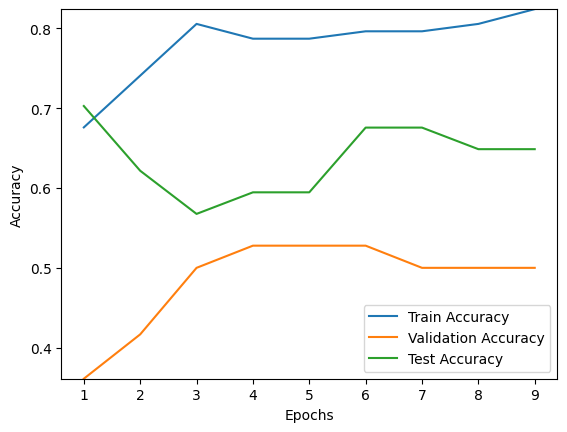

dataset/FTD_90_200_fMRI.mat: The average accuracy is 0.6973
---------------------------------------------------------------------------------------------------------------------------------

Random seed is set to 0.
{'NC': 0, 'OCD': 1}
Shape of data matrix:  (82, 18000)
Shape of labels vector:  (82,)
Epoch 2: Train: 0.7755, Val: 0.6875, Test: 0.7059
Epoch 3: Train: 0.7755, Val: 0.6875, Test: 0.6471
Epoch 4: Train: 0.7755, Val: 0.7500, Test: 0.7059
Epoch 5: Train: 0.7755, Val: 0.7500, Test: 0.7059
Epoch 6: Train: 0.7755, Val: 0.7500, Test: 0.7059
Epoch 7: Train: 0.7755, Val: 0.7500, Test: 0.7059
Epoch 8: Train: 0.7755, Val: 0.8125, Test: 0.7059
Epoch 9: Train: 0.7755, Val: 0.8125, Test: 0.7059
Epoch 10: Train: 0.7755, Val: 0.7500, Test: 0.6471
Epoch 11: Train: 0.7755, Val: 0.7500, Test: 0.5882
Best test epoch 2: train_acc=0.7755, val_acc=0.6875, test_acc=0.7059
avg_acc: 0.3077


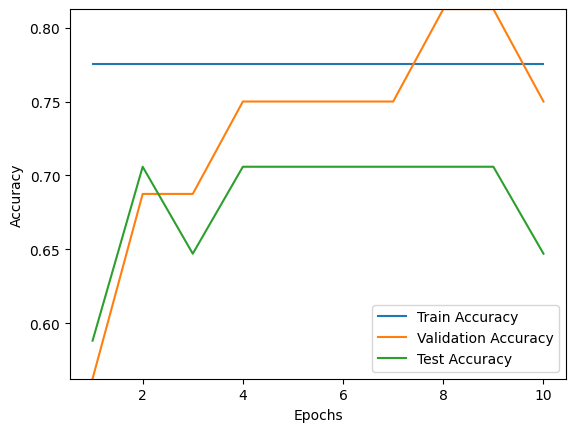

Random seed is set to 1.
{'NC': 0, 'OCD': 1}
Shape of data matrix:  (82, 18000)
Shape of labels vector:  (82,)
Epoch 4: Train: 0.7959, Val: 0.7500, Test: 0.7059
Epoch 5: Train: 0.7959, Val: 0.6875, Test: 0.7059
Epoch 6: Train: 0.7959, Val: 0.7500, Test: 0.7059
Epoch 7: Train: 0.8163, Val: 0.6875, Test: 0.6471
Epoch 8: Train: 0.8163, Val: 0.6875, Test: 0.7059
Epoch 9: Train: 0.8163, Val: 0.6875, Test: 0.7059
Epoch 10: Train: 0.8367, Val: 0.6875, Test: 0.6471
Epoch 11: Train: 0.8571, Val: 0.6250, Test: 0.5882
Epoch 12: Train: 0.8776, Val: 0.6250, Test: 0.4706
Epoch 13: Train: 0.8776, Val: 0.6250, Test: 0.4118
Best test epoch 4: train_acc=0.7959, val_acc=0.7500, test_acc=0.7059
avg_acc: 0.3544


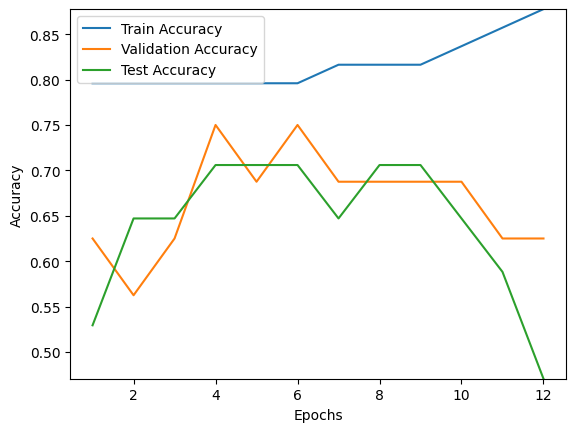

Random seed is set to 2.
{'NC': 0, 'OCD': 1}
Shape of data matrix:  (82, 18000)
Shape of labels vector:  (82,)
Epoch 6: Train: 0.7551, Val: 0.6875, Test: 0.7647
Epoch 7: Train: 0.7551, Val: 0.6875, Test: 0.7059
Epoch 8: Train: 0.7551, Val: 0.7500, Test: 0.7059
Epoch 9: Train: 0.7551, Val: 0.7500, Test: 0.7647
Epoch 10: Train: 0.7551, Val: 0.7500, Test: 0.7647
Epoch 11: Train: 0.7551, Val: 0.7500, Test: 0.7059
Epoch 12: Train: 0.7551, Val: 0.8125, Test: 0.7059
Epoch 13: Train: 0.7551, Val: 0.6875, Test: 0.7059
Epoch 14: Train: 0.7551, Val: 0.6875, Test: 0.7059
Epoch 15: Train: 0.7551, Val: 0.6875, Test: 0.6471
Best test epoch 6: train_acc=0.7551, val_acc=0.6875, test_acc=0.7647
avg_acc: 0.2478


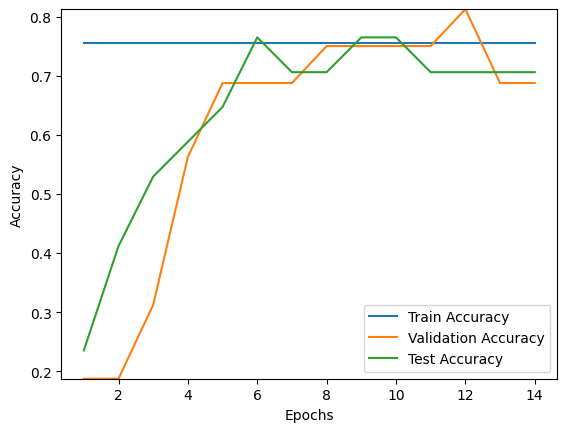

Random seed is set to 3.
{'NC': 0, 'OCD': 1}
Shape of data matrix:  (82, 18000)
Shape of labels vector:  (82,)
Epoch 16: Train: 0.8163, Val: 0.6875, Test: 0.8235
Epoch 17: Train: 0.8571, Val: 0.6250, Test: 0.8235
Epoch 18: Train: 0.8571, Val: 0.6250, Test: 0.8235
Epoch 19: Train: 0.8776, Val: 0.5625, Test: 0.6471
Epoch 20: Train: 0.8980, Val: 0.5000, Test: 0.5294
Epoch 21: Train: 0.8980, Val: 0.3750, Test: 0.4118
Epoch 22: Train: 0.8980, Val: 0.3125, Test: 0.4118
Epoch 23: Train: 0.8980, Val: 0.3125, Test: 0.3529
Epoch 24: Train: 0.9388, Val: 0.2500, Test: 0.2941
Epoch 25: Train: 0.9388, Val: 0.2500, Test: 0.2941
Best test epoch 16: train_acc=0.8163, val_acc=0.6875, test_acc=0.8235
avg_acc: 0.3435


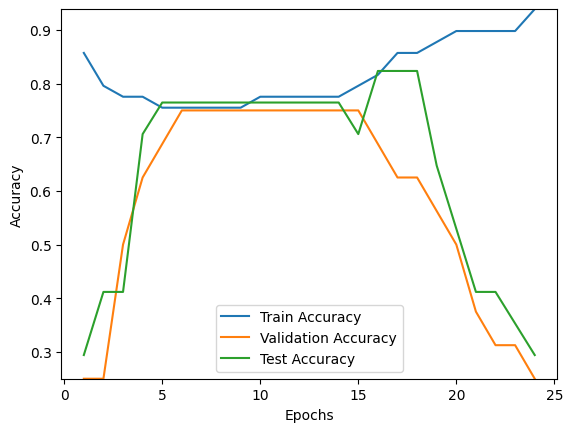

Random seed is set to 4.
{'NC': 0, 'OCD': 1}
Shape of data matrix:  (82, 18000)
Shape of labels vector:  (82,)
Epoch 6: Train: 0.7755, Val: 0.4375, Test: 0.7647
Epoch 7: Train: 0.7755, Val: 0.4375, Test: 0.7647
Epoch 8: Train: 0.7755, Val: 0.4375, Test: 0.7647
Epoch 9: Train: 0.7959, Val: 0.4375, Test: 0.7647
Epoch 10: Train: 0.8163, Val: 0.4375, Test: 0.7059
Epoch 11: Train: 0.8776, Val: 0.3750, Test: 0.6471
Epoch 12: Train: 0.8571, Val: 0.3750, Test: 0.5882
Epoch 13: Train: 0.8980, Val: 0.4375, Test: 0.5882
Epoch 14: Train: 0.8980, Val: 0.5000, Test: 0.5294
Epoch 15: Train: 0.9184, Val: 0.5000, Test: 0.4118
Best test epoch 6: train_acc=0.7755, val_acc=0.4375, test_acc=0.7647
avg_acc: 0.3562


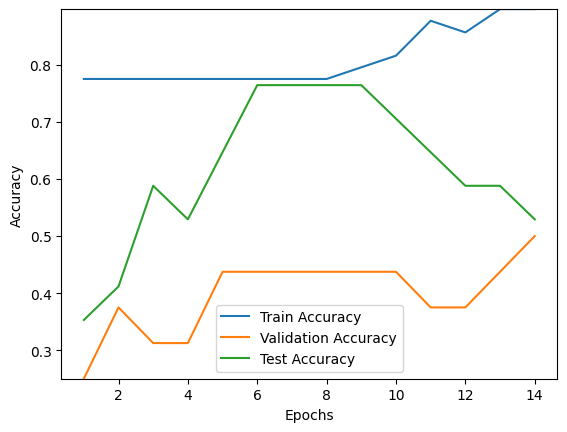

dataset/OCD_90_200_fMRI.mat: The average accuracy is 0.7529
---------------------------------------------------------------------------------------------------------------------------------

#########################################################################################################################################

dataset/ADNI.mat: The average accuracy is 0.3651, std is 0.0224
dataset/PPMI.mat: The average accuracy is 0.7028, std is 0.0263
dataset/ADNI_90_120_fMRI.mat: The average accuracy is 0.3721, std is 0.0147
dataset/FTD_90_200_fMRI.mat: The average accuracy is 0.6973, std is 0.0878
dataset/OCD_90_200_fMRI.mat: The average accuracy is 0.7529, std is 0.0440


In [3]:
file_paths = ['dataset/ADNI.mat', 'dataset/PPMI.mat', 'dataset/ADNI_90_120_fMRI.mat', 'dataset/FTD_90_200_fMRI.mat', 'dataset/OCD_90_200_fMRI.mat']
methods_acc = []
methods_std = []
# file_paths = ['dataset/ADNI_90_120_fMRI.mat', 'dataset/FTD_90_200_fMRI.mat', 'dataset/OCD_90_200_fMRI.mat']

for file_path in file_paths:

    seeds=[0, 1, 2, 3, 4]
    seeds_best_acc = []

    for seed in seeds:

        # 设置随机种子
        def set_seed(seed):
            torch.manual_seed(seed)
            torch.cuda.manual_seed(seed)
            torch.cuda.manual_seed_all(seed)
            np.random.seed(seed)
            random.seed(seed)
            torch.manual_seed(seed)
            torch.backends.cudnn.benchmark = False
            torch.backends.cudnn.deterministic = True
            print('Random seed is set to {}.'.format(seed))
        set_seed(seed)


        mat_data=scipy.io.loadmat(file_path)

        train_ratio=0.6
        valid_ratio=0.2
        test_ratio=0.2

        X_train=[]
        X_test=[]
        y_train=[]
        y_test=[]
        X_valid=[]
        y_valid=[]

        y_train_master=[] # 在主分类器中, 将 MCI, MCIn, MCIp 合并为一类的训练集标签
        y_valid_master=[]
        y_test_master=[]
        Labels=[key for key in mat_data.keys() if not key.startswith('__')]
        dict_labels = {label: i for i, label in enumerate(Labels)}
        print(dict_labels)
        scaler=StandardScaler()

        X_train_MCI=[] # MCI, MCIn, MCIp 的训练集, 验证集及其标签
        X_valid_MCI=[]
        y_train_MCI=[]
        y_valid_MCI=[]
        X_test_MCI=[]
        y_test_MCI=[]


        for label, data in mat_data.items():
            if label.startswith('__'):
                continue
            label_num = dict_labels[label]
            N = np.shape(data)[0]
            indices = np.random.permutation(N)
            train_end = int(train_ratio * N)
            valid_end = int((train_ratio + valid_ratio) * N)

            train_index = indices[:train_end]
            validation_index = indices[train_end:valid_end]
            test_index = indices[valid_end:]
            # print(indices)
            # print(train_index,validation_index,test_index)
            for i in range(N):
                if i in train_index:
                    X_train.append(data[i])
                    y_train.append(label_num)
                    if file_path == 'dataset/ADNI.mat' and label_num>=1 and label_num<=3:
                        y_train_master.append(-1)
                        X_train_MCI.append(data[i]) # MCI, MCIn, MCIp 的训练集
                        y_train_MCI.append(label_num)
                    else:
                        y_train_master.append(label_num)
                if i in validation_index:
                    X_valid.append(data[i])
                    y_valid.append(label_num)
                    if file_path == 'dataset/ADNI.mat' and label_num>=1 and label_num<=3:
                        y_valid_master.append(-1)
                        X_valid_MCI.append(data[i]) # MCI, MCIn, MCIp 的验证集
                        y_valid_MCI.append(label_num)
                    else:
                        y_valid_master.append(label_num)
                if i in test_index:
                    X_test.append(data[i])
                    y_test.append(label_num)
                    if file_path == 'dataset/ADNI.mat' and label_num>=1 and label_num<=3:
                        y_test_master.append(-1)
                        X_test_MCI.append(data[i]) # MCI, MCIn, MCIp 的测试集
                        y_test_MCI.append(label_num)
                    else:
                        y_test_master.append(label_num)
                    

        dict_labels_MCI = {label: i for i, label in enumerate(Labels[1:])}
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        y_train_master = np.array(y_train_master)

        X_valid = np.array(X_valid)
        y_valid = np.array(y_valid)
        y_valid_master = np.array(y_valid_master)

        X_train_MCI = np.array(X_train_MCI)
        y_train_MCI = np.array(y_train_MCI)

        X_valid_MCI = np.array(X_valid_MCI)
        y_valid_MCI = np.array(y_valid_MCI)

        X_test = np.array(X_test)
        y_test = np.array(y_test)
        y_test_master = np.array(y_test_master)
        def normalize(X):
            if len(X) != 0:
                scaler = StandardScaler()
                X = scaler.fit_transform(X)
                # X=(X-np.mean(X,axis=0))/np.std(X,axis=0)
            return X



        if file_path in ['dataset/ADNI.mat', 'dataset/PPMI.mat']:
            X_train = normalize(X_train)
            X_valid = normalize(X_valid)
            X_train_MCI = normalize(X_train_MCI)
            X_valid_MCI = normalize(X_valid_MCI)
            X_test = normalize(X_test)
            X_test_MCI = normalize(X_test_MCI)

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')









        ### Load data
        train_num = X_train.shape[0]
        val_num = X_valid.shape[0]
        test_num = X_test.shape[0]
        if file_path in ['dataset/ADNI.mat', 'dataset/PPMI.mat']:
            num_features = X_train.shape[1]
        else:
            num_features = X_train.shape[1]*X_train.shape[2]
        num_classes = len(Labels)


        ## Construct the graph
        def construct_knn_drop_graph(X, y, val_idx, k=5, metric='unsupervised', ratio=0.3, drop_classes=1, density=0.1, drop_edges=24):
            '''
            Description: Construct the knn graph of the data.
            Input:
            - X: Train data and test data
            - y: The label of train data.
            - k: The number of nearest neighbors.
            Return:
                - the knn graph of the data.
            '''
            knn = NearestNeighbors(n_neighbors=k, metric=metric)
            knn.fit(X)
            _, indices = knn.kneighbors(X) # Indices of the nearest points in the population matrix.
            adj_mat = np.zeros((len(X), len(X)))
            for i in range(len(X)):
                for j in range(k):
                    if i>=val_idx[0]:
                        drop_class_idx = random.sample(range(len(Labels)), drop_classes)
                        if indices[i][j] < val_idx[0] and y[indices[i][j]] in drop_class_idx:
                            continue
                    adj_mat[i][indices[i][j]] = 1
                    adj_mat[indices[i][j]][i] = 1

            dist_valid=[]
            dist_test=[]
            for i in range(len(X)):  # 尝试一些删边手段，修改邻接矩阵
                for j in range(i+1,len(X)):
                    if i >= val_idx[0] and i<test_idx[0] and j >= val_idx[0] and j<test_idx[0]: # 验证集内部进行删边
                        if adj_mat[i][j]==1:
                            # print(np.linalg.norm(np.squeeze(X[i])-np.squeeze(X[j])))
                            dist_valid.append([np.linalg.norm(X[i]-X[j]),[i,j]])
                    if i>=test_idx[0] and j>=test_idx[0]: # 测试集内部进行删边
                        if adj_mat[i][j]==1:
                            dist_test.append([np.linalg.norm(X[i]-X[j]),[i,j]])
                        # 测试集内部进行删边
                        # drop_edge_idx_test = random.sample(range(val_idx[0],test_idx[0]), drop_edges)
                        # if indices[i][j] >= test_idx[0] and y[indices[i][j]] in drop_edge_idx_test:
                        #     continue

                        # 随机选择 drop_class 个类，断开测试集和验证集中的样本与训练集中这些类的连边
                    

                        # 随机选择 k/2 个邻居连边
                        # random_sample = random.sample(range(k), int(k*ratio))
                        # if j in random_sample:
                        #     adj_mat[i][indices[i][j]] = 1
                        #     adj_mat[indices[i][j]][i] = 1
            dist_valid.sort(key=lambda x:x[0],reverse=True)
            dist_test.sort(key=lambda x:x[0],reverse=True) # 按照距离进行排序
            dist_valid=np.array(dist_valid)
            dist_test=np.array(dist_test)
            drop_valid=dist_valid[:drop_edges]
            drop_test=dist_test[:drop_edges]
            for _,idx in drop_valid:
                adj_mat[idx[0]][idx[1]]=0
                adj_mat[idx[1]][idx[0]]=0
            for _,idx in drop_test:
                adj_mat[idx[0]][idx[1]]=0
                adj_mat[idx[1]][idx[0]]=0
            for i in val_idx:
                for j in test_idx:
                    adj_mat[i][j]=0
                    adj_mat[j][i]=0
            # 将连边加入邻接矩阵
            edge_index = []
            for i in range(len(X)):
                for j in range(i+1,len(X)):
                    # 随机断开验证集和测试集内的点与连边
                    if adj_mat[i][j]==1: # 对于训练集中的数据，只有两个是同一类才连边
                        # edge_index.append([i,j])
                        if i>=train_num or j>=train_num: # 如果两个点有一个不是训练集，就直接根据邻接矩阵连边
                            edge_index.append([i, j])
                        if i<train_num and j<train_num and y[i]==y[j]:
                            edge_index.append([i, j])
                        # if i >= val_idx[0] and np.random.rand()<=density: # 对于验证集内部的点，随机断开一些连边
                        # drop_edge_idx = random.sample(range(val_idx[0],test_idx[0]), drop_edges)
                        # if 
            edge_index = torch.tensor(edge_index).T
            edge_index = edge_index.to(device)
            X = X.astype(np.float32)
            X = torch.tensor(X).float().to(device)
            y = torch.tensor(y).long().to(device)
            # print(X.shape,y.shape)
            data = pyg.data.Data(x=X, edge_index=edge_index, y=y)
            return data


        def construct_knn_nodrop_graph(X, y, val_idx, k=5, metric='unsupervised', ratio=0.3, drop_class=0, density=0.1, drop_edges=0):
            '''
            Description: Construct the knn graph of the data.
            
            Input:
            - X: Train data and test data.
            - y: The label of train data.
            - k: The number of nearest neighbors.
            
            Return:
                - the knn graph of the data.
            '''
            knn=NearestNeighbors(n_neighbors=k, metric=metric)
            knn.fit(X)
            _, indices = knn.kneighbors(X) # Indices of the nearest points in the population matrix.
            adj_mat=np.zeros((len(X),len(X)))
            for i in range(len(X)):
                for j in range(k):
                    adj_mat[i][indices[i][j]]=1
            edge_index = []
            for i in range(len(X_train)):
                for j in range(len(X_train)):
                    if j>i and adj_mat[i][j]==1:
                        edge_index.append([i,j])
            edge_index = torch.tensor(edge_index).T
            edge_index = edge_index.to(device)
            X=X.astype(np.float32)
            X = torch.tensor(X).float().to(device)
            y = torch.tensor(y).long().to(device)
            # print(X.shape,y.shape)
            data = pyg.data.Data(x=X,edge_index=edge_index,y=y)
            return data



        def construct_random1_graph(X, y, num_neighbors=5, density=0.1):
            '''
            Description: Construct a random graph from the data.
            Input:
            - X: Data.
            - y: Labels.
            - num_neighbors: The number of neighbors for each node.
            - density: The edge density in the random graph.
            Return:
            - A random graph as a PyTorch Geometric Data object.
            '''

            num_nodes = len(X)
            adj_mat = np.zeros((num_nodes, num_nodes))

            for i in range(num_nodes):
                for j in range(i + 1, num_nodes):
                    if np.random.rand() < density:
                        adj_mat[i][j] = 1
                        adj_mat[j][i] = 1

            # Randomly select 'num_neighbors' neighbors for each node
            for i in range(num_nodes):
                neighbors = np.where(adj_mat[i] == 1)[0]
                if len(neighbors) > num_neighbors:
                    random_neighbors = np.random.choice(neighbors, num_neighbors, replace=False)
                    adj_mat[i] = 0
                    adj_mat[i][random_neighbors] = 1

            edge_index = np.where(adj_mat == 1)
            edge_index = torch.tensor(edge_index, dtype=torch.long).to(device)

            X = X.astype(np.float32)
            X = torch.tensor(X, dtype=torch.float32).to(device)
            y = torch.tensor(y, dtype=torch.long).to(device)

            data = pyg.data.Data(x=X, edge_index=edge_index, y=y)

            return data


        def construct_random2_graph(X, y, num_neighbors=5, prob_rewire=0.2):
            '''
            Description: Construct a random graph from the data.
            Input:
            - X: Data.
            - y: Labels.
            - num_neighbors: The number of neighbors for each node.
            - prob_rewire: The probability of rewiring edges in the Watts-Strogatz model.
            Return:
            - A random graph as a PyTorch Geometric Data object.
            '''

            # Create a Watts-Strogatz random graph
            G = nx.watts_strogatz_graph(len(X), num_neighbors, prob_rewire)

            # Convert the NetworkX graph to a PyTorch Geometric Data object
            edge_index = torch.tensor(list(G.edges()), dtype=torch.long).t()
            edge_index = edge_index.to(device)

            X = X.astype(np.float32)
            X = torch.tensor(X, dtype=torch.float32).to(device)
            y = torch.tensor(y, dtype=torch.long).to(device)

            data = pyg_data.Data(x=X, edge_index=edge_index, y=y)

            return data


        ### Define the model
        class GCN(nn.Module):
            def __init__(self, num_node_features, num_classes):
                super().__init__()

                self.num_classes = num_classes

                # self.conv1 = GCNConv(num_node_features, 64)
                # self.conv2 = GCNConv(64, num_classes)
                # self.norm = torch.nn.BatchNorm1d(64)
                self.conv1 = GATConv(num_node_features, 4, heads=8, dropout=0.5)
                self.conv2 = GATConv(4*8, num_classes, heads=8, concat=False, dropout=0.5)
                self.norm = torch.nn.BatchNorm1d(4*8)

            def forward(self, data):
                x, edge_index = data.x, data.edge_index

                x = self.conv1(x, edge_index)
                x = self.norm(x)
                x = F.relu(x)
                # x = F.dropout(x, training=self.training)
                x = self.conv2(x, edge_index)

                return x


        ### Train the model
        def train():

            train_acc, val_acc, test_acc = 0, 0, 0
            best_train_acc, best_val_acc, best_test_acc = 0, 0, 0
            best_test_epoch = 0
            avg_test_acc = 0

            # track accuracies over epochs
            train_accuracies = []
            val_accuracies = []
            test_accuracies = []

            optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
            loss_function = torch.nn.CrossEntropyLoss().to(device)
            for epoch in range(run_epochs):
                model.train()
                out = model(data)
                optimizer.zero_grad()
                loss = loss_function(out[data.train_mask], data.y[data.train_mask])
                loss.backward()
                optimizer.step()

                train_acc, val_acc, test_acc = test()
                train_accuracies.append(train_acc)
                val_accuracies.append(val_acc)
                test_accuracies.append(test_acc)
                if test_acc > best_test_acc:
                    best_train_acc = train_acc
                    best_val_acc = val_acc
                    best_test_acc = test_acc
                    best_test_epoch = epoch


            avg_test_acc = sum(test_accuracies) / run_epochs
            seeds_best_acc.append(best_test_acc)

            # print accuracies of best epoch and the following 9 epochs
            for i in range(best_test_epoch, min(run_epochs, best_test_epoch + 10)):
                print(f'Epoch {i+1}: Train: {train_accuracies[i]:.4f}, Val: {val_accuracies[i]:.4f}, Test: {test_accuracies[i]:.4f}')

            print(f"Best test epoch {best_test_epoch+1}: train_acc={best_train_acc:.4f}, val_acc={best_val_acc:.4f}, test_acc={best_test_acc:.4f}")
            print(f"avg_acc: {avg_test_acc:.4f}")

            plt_epoch = min(best_test_epoch+9, run_epochs)

            # plot from first epoch to the best epoch
            plt.plot(range(1, plt_epoch+1), train_accuracies[:plt_epoch], label='Train Accuracy')
            plt.plot(range(1, plt_epoch+1), val_accuracies[:plt_epoch], label='Validation Accuracy')
            plt.plot(range(1, plt_epoch+1), test_accuracies[:plt_epoch], label='Test Accuracy')
            plt.ylim([min(train_accuracies[:plt_epoch]+val_accuracies[:plt_epoch]+test_accuracies[:plt_epoch]), 
                    max(train_accuracies[:plt_epoch]+val_accuracies[:plt_epoch]+test_accuracies[:plt_epoch])]) 
            # plt.plot(range(1, run_epochs+1), train_accuracies[:], label='Train Accuracy')
            # plt.plot(range(1, run_epochs+1), val_accuracies[:], label='Validation Accuracy')
            # plt.plot(range(1, run_epochs+1), test_accuracies[:], label='Test Accuracy')
            # plt.ylim([min(train_accuracies[:]+val_accuracies[:]+test_accuracies[:]), 
            #         max(train_accuracies[:]+val_accuracies[:]+test_accuracies[:])]) 
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()



        ### Test the model
        def test():
            model.eval()
            log, accs = model(data), []
            for _, mask in data('train_mask', 'val_mask', 'test_mask'):
                pred = log[mask].max(1)[1]
                acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
                accs.append(acc)
            return accs


        model = GCN(num_features, num_classes).to(device)

        ### Load and split the data
        if file_path in ['dataset/ADNI.mat', 'dataset/PPMI.mat']:
            X = np.concatenate((X_train, X_valid, X_test), axis=0)
            y = np.concatenate((y_train, y_valid, y_test), axis=0)
        else:
            X_train = X_train.reshape(X_train.shape[0], -1)
            X_valid = X_valid.reshape(X_valid.shape[0], -1)
            X_test = X_test.reshape(X_test.shape[0], -1)
            X = np.concatenate((X_train, X_valid, X_test), axis=0)
            y = np.concatenate((y_train, y_valid, y_test), axis=0)

        train_idx = np.array(range(X_train.shape[0]))
        val_idx = np.array(range(X_train.shape[0], X_train.shape[0]+X_valid.shape[0]))
        train_and_val_idx = np.array(range(X_train.shape[0]+X_valid.shape[0]))
        test_idx = np.array(range(X_train.shape[0]+X_valid.shape[0], X_train.shape[0]+X_valid.shape[0]+X_test.shape[0]))
        print("Shape of data matrix: ", X.shape)
        print("Shape of labels vector: ", y.shape)
        all_f = np.zeros((X.shape[0],), dtype=np.bool_)

        if graph_type == 'knn_drop':
            data = construct_knn_drop_graph(X, y, val_idx=val_idx, k=k_neighbors, metric=knn_metric, ratio=drop_ratio, drop_classes=drop_classes, density=density, drop_edges=drop_edges)
        elif graph_type == 'knn_nodrop':
            data = construct_knn_nodrop_graph(X, y, val_idx=val_idx, k=k_neighbors, metric=knn_metric, ratio=drop_ratio, density=density)
        elif graph_type == 'random1':
            data = construct_random1_graph(X, y, val_idx=val_idx, num_neighbors=k_neighbors, density=density)
        elif graph_type == 'random2':
            data = construct_random2_graph(X, y, val_idx=val_idx, num_neighbors=k_neighbors, prob_rewire=density)

        all_f_tmp = all_f.copy()
        all_f_tmp[train_idx] = True
        train_mask = all_f_tmp

        all_f_tmp = all_f.copy()
        all_f_tmp[val_idx] = True
        val_mask = all_f_tmp

        all_f_tmp = all_f.copy()
        all_f_tmp[train_and_val_idx] = True
        train_and_val_mask = all_f_tmp

        all_f_tmp = all_f.copy()
        all_f_tmp[test_idx] = True
        test_mask = all_f_tmp

        # print(y.shape, train_idx.shape, val_idx.shape, train_and_val_idx.shape, test_idx.shape)
        # print(train_mask.shape, val_mask.shape, train_and_val_mask.shape, test_mask.shape)
        # print(y[train_mask].shape, y[val_mask].shape, y[train_and_val_mask].shape, y[test_mask].shape)

        data.train_mask = train_mask
        data.val_mask = val_mask
        data.train_and_val_mask = train_and_val_mask
        data.test_mask = test_mask

        ### Train the model and test the model
        train()


    seeds_avg_acc = sum(seeds_best_acc) / 5

    print(f"{file_path}: The average accuracy is {seeds_avg_acc:.4f}")
    methods_acc.append(seeds_avg_acc)
    methods_std.append(np.std(seeds_best_acc))
    print("---------------------------------------------------------------------------------------------------------------------------------\n")



print("#########################################################################################################################################\n")
i = 0
for file_path in file_paths:
    print(f"{file_path}: The average accuracy is {methods_acc[i]:.4f}, std is {methods_std[i]:.4f}")
    i = i + 1